1.regression model

1.1 regression is a statistic method to solve problem and proceeds a model between one or more independent variable and dependent variable
回归是对一个或多个自变量和因变量之间的关系进行建模，求解的一种统计方法

In [2]:
# import some packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

read data

In [4]:
data_cars = pd.read_csv("/home/bio_kang/Learning/machine_learning/data/cars.csv",usecols = ['speed','dist'])

draw scatter plot of data to get a visualized cognition

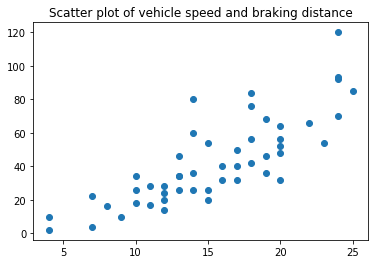

In [5]:
# draw a scatter plot
speed = data_cars['speed']
dist = data_cars['dist']
plt.scatter(speed,dist)
plt.title('Scatter plot of vehicle speed and braking distance')
plt.show()


直观的感受到车速与距离之间貌似有一种线性相关关系，可以用下列公式来描述他们之间的关系：
    y = a + bx （损失函数）
其中 y 为刹车距离，x 为车速， a,b 为回归系数

1.直接法求解损失函数：
    损失函数为凸函数（f[(x1+x2)/2] <= (f(x1)+f(x2))/2 ） # 函数为增函数且函数全部可导
    损失函数通过严格的公式所求的的解

In [9]:
# 设置回归系数
import sympy

# 设定回归系数
alpha, beta = sympy.symbols('alpha beta')

# 设定损失函数
L = 0.5*np.sum((dist - beta*speed - alpha)**2)

# 求偏导
print(sympy.diff(L, alpha))
print(sympy.diff(L, beta))

f1 = sympy.diff(L, alpha)
f2 = sympy.diff(L, beta)

# 求解线性方程组
outcome = sympy.solve([f1, f2], [alpha, beta])
print(outcome)

50.0*alpha + 770.0*beta - 2149.0
770.0*alpha + 13228.0*beta - 38482.0
{alpha: -17.5790948905109, beta: 3.93240875912409}


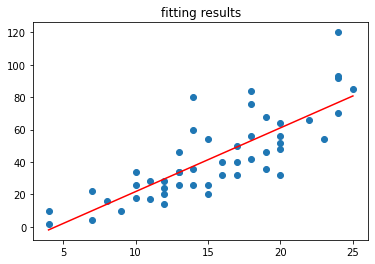

In [11]:
# draw a line of loss function
alpha_num = outcome[alpha]
beta_num = outcome[beta]

# prediction
dist_pre = beta_num*speed + alpha_num
plt.scatter(speed, dist)
plt.plot(speed, dist_pre, c='r')
plt.title('fitting results')
plt.show()

2.迭代法求损失函数：
迭代法是一种不断用变量的旧值递推新值的过程（用旧值修正对最优解的估计）这里使用“小批量梯度下降法”

确定要求解的模型参数,模型参数可以1个，也可以是多个；
定义损失函数L，确定迭代递推关系，用于更新模型参数；
确定模型参数初始值,学习率,迭代次数,以及批量大小。
count = 1
while (count <= 迭代次数):
count += 1
根据迭代递推关系计算新值，更新模型参数

In [20]:
import random

# define relation of iteration and renew variable
def update_var(old_alpha, old_beta, y, x, learning_rate):
    len_x = len(x)
    alpha_delta = np.sum(-(y - old_beta*x - old_alpha))/len_x
    beta_delta = np.sum(-x*(y - old_beta*x - old_alpha))/len_x
    new_alpha = old_alpha - learning_rate*alpha_delta
    new_beta = old_beta - learning_rate*beta_delta

    return(new_alpha, new_beta)

# iteration
def iterative_func(y, x, start_alpha, start_beta,learning_rate, iterative_num, sample_num):
    alpha_list = []
    beta_list = []
    alpha = start_alpha
    beta = start_beta
    num_list = list(range(1, len(y)+1))
    for i in range(iterative_num):
        alpha_list.append(alpha)
        beta_list.append(beta)
        random.shuffle(num_list)

        index = num_list[:sample_num]
        alpha, beta = update_var(alpha, beta, y[index], x[index], learning_rate)
    return(alpha_list, beta_list)

# 在[0-10)之间按照均匀分布随机参数alpha和beta的初始值
start_alpha = np.random.random()*10
start_beta = np.random.random()*10

# 设置学习率为0.002，迭代次数为20000次，批量大小为16
learning_rate = 0.002
iterative_num = 20000
sample_num = 16

alpha_list, beta_list = iterative_func(dist, speed, start_alpha, start_beta, learning_rate, iterative_num, sample_num)
print("alpha:{1},beta:{2}".format(alpha_list[-1],beta_list[-1]))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([50], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"